## Aplicación de charapy en caso práctico

In [35]:
import pandas as pd
import numpy as np
import pylab as pl

In [36]:
df1 = pd.read_csv('gas_condensate_mixture.csv')
df2 = pd.read_csv('com.csv')

In [37]:
cn1 = df1['carbon_number'][1:-1]
z1 = df1['mole_percentage'][1:-1]
mw1 = df1['molecular_weight'][1:-1]
rho1 = df1['density'][1:-1]

cn2 = df2['component'][1:-1]
z2 = df2['molar_percentage'][1:-1]
mw2 = df2['molar_mass'][1:-1]
rho2 = df2['density'][1:-1]

# Ajuste de constantes

In [38]:
from charapy import Foo_fit
foo_fit = Foo_fit()

fit_parameters1 = {'A':foo_fit.fit_AB(cn1,z1)[0][0],
                   'B':foo_fit.fit_AB(cn1,z1)[0][1],
                   'L':foo_fit.fit_LM(cn1,rho1)[1][0],
                   'M':foo_fit.fit_LM(cn1,rho1)[1][1],
                   'Ac':foo_fit.fit_AcBc(cn1,z1)[0][0],
                   'Bc':foo_fit.fit_AcBc(cn1,z1)[0][1],
                   'Ad':foo_fit.fit_Ad(cn1,rho1)[0][0],
                   'C':foo_fit.fit_C(cn1,mw1)[0]}

fit_parameters2 = {'A':foo_fit.fit_AB(cn2,z2)[0][0],
                   'B':foo_fit.fit_AB(cn2,z2)[0][1],
                   'L':foo_fit.fit_LM(cn2,rho2)[1][0],
                   'M':foo_fit.fit_LM(cn2,rho2)[1][1],
                   'Ac':foo_fit.fit_AcBc(cn2,z2)[0][0],
                   'Bc':foo_fit.fit_AcBc(cn2,z2)[0][1],
                   'Ad':foo_fit.fit_Ad(cn2,rho2)[0][0],
                   'C':foo_fit.fit_C(cn2,mw2)[0]}

In [39]:
from charapy import Distribution_pedersen
dped = Distribution_pedersen()

A1 = fit_parameters1['A']
B1 = fit_parameters1['B']

A2 = fit_parameters2['A']
B2 = fit_parameters2['B']

cn1_est_ped = dped.carbon_number(z1,A1,B1)
cn2_est_ped = dped.carbon_number(z2,A2,B2)

## Analisis grafico PEDERSEN

Text(0.5, 0, 'carbon number')

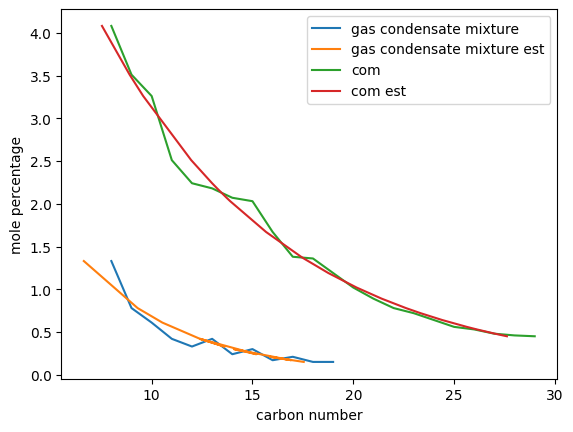

In [40]:
pl.plot(cn1,z1,label='gas condensate mixture')
pl.plot(cn1_est_ped,z1,label = 'gas condensate mixture est')
pl.plot(cn2,z2,label='com')
pl.plot(cn2_est_ped,z2,label='com est')

pl.legend(loc='upper right')
pl.ylabel('mole percentage')
pl.xlabel('carbon number')

In [41]:
z1_est_ped = dped.p_molar_fraction(cn1,A1,B1)
z2_est_ped = dped.p_molar_fraction(cn2,A2,B2)

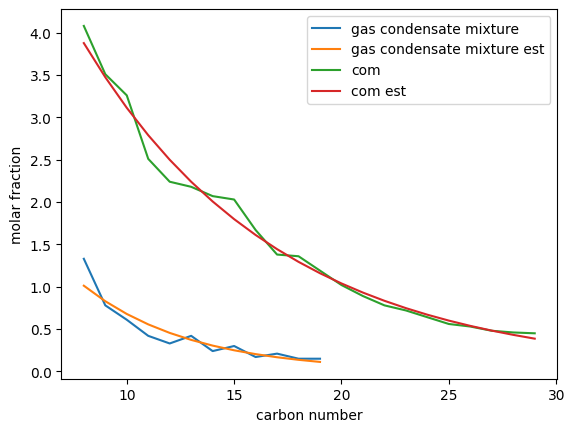

In [42]:
pl.plot(cn1,z1,label='gas condensate mixture')
pl.plot(cn1,z1_est_ped,label='gas condensate mixture est')

pl.plot(cn2,z2,label='com')
pl.plot(cn2,z2_est_ped,label='com est')

pl.xlabel('carbon number')
pl.ylabel('molar fraction')
pl.legend(loc='upper right')

In [43]:
L1 = fit_parameters1['L']
L2 = fit_parameters2['L']

M1 = fit_parameters1['M']
M2 = fit_parameters2['M']

rho1_est_ped = dped.p_density(cn1,L1,M1)
rho2_est_ped = dped.p_density(cn2,L2,M2)

Text(0.5, 0, 'carbon number')

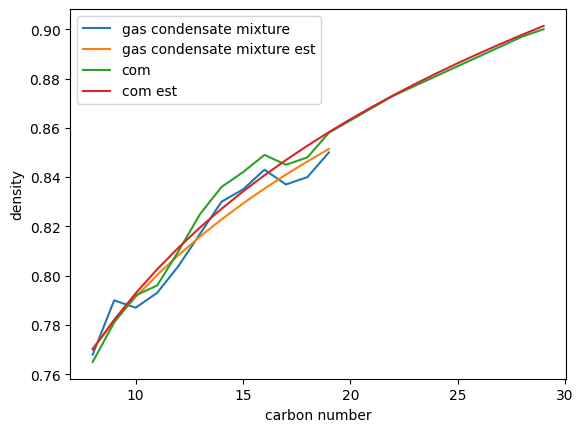

In [44]:
pl.plot(cn1,rho1,label = 'gas condensate mixture')
pl.plot(cn1,rho1_est_ped,label = 'gas condensate mixture est')

pl.plot(cn2,rho2,label='com')
pl.plot(cn2,rho2_est_ped,label='com est')

pl.legend(loc='upper left')
pl.ylabel('density')
pl.xlabel('carbon number')

In [45]:
mw1_est_ped = dped.p_molecular_weight(cn1)
mw2_est_ped = dped.p_molecular_weight(cn2)

Text(0.5, 0, 'carbon number')

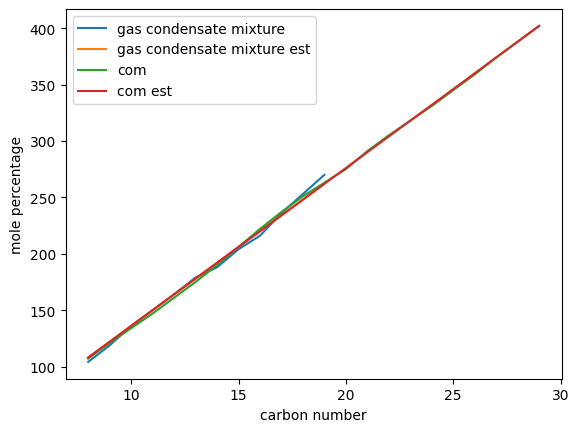

In [46]:
pl.plot(cn1,mw1,label='gas condensate mixture')
pl.plot(cn1,mw1_est_ped,label='gas condensate mixture est')

pl.plot(cn2,mw2,label='com')
pl.plot(cn2,mw2_est_ped,label='com est')

pl.legend(loc='upper left')
pl.ylabel('mole percentage')
pl.xlabel('carbon number')

## Analisis grafico CISMONDI

In [47]:
from charapy import Distribution_cismondi
dcis = Distribution_cismondi()

In [48]:
AC1 = fit_parameters1['Ac']
AC2 = fit_parameters2['Ac']

BC1 = fit_parameters1['Bc']
BC2 = fit_parameters2['Bc']

z1_est_cis = dcis.c_molar_fraction(cn1,AC1,BC1)
z2_est_cis = dcis.c_molar_fraction(cn2,AC2,BC2)

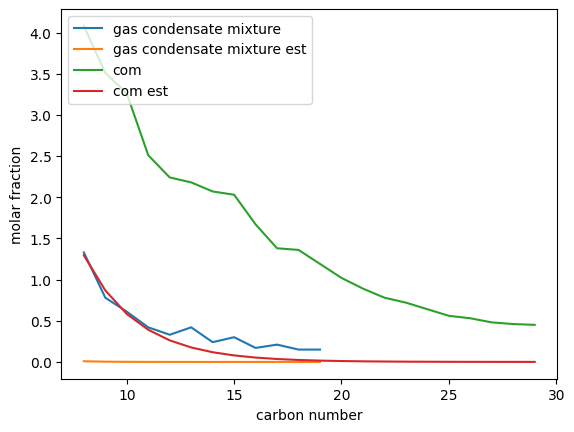

In [49]:
pl.plot(cn1,z1,label='gas condensate mixture')
pl.plot(cn1,z1_est_cis,label='gas condensate mixture est')

pl.plot(cn2,z2,label='com')
pl.plot(cn2,z2_est_cis,label='com est')

pl.xlabel('carbon number')
pl.ylabel('molar fraction')
pl.legend(loc='upper left')

In [50]:
C1 = fit_parameters1['C']
C2 = fit_parameters2['C']

mw1_est_cis = dcis.c_molecular_weight(cn1,C1)
mw2_est_cis = dcis.c_molecular_weight(cn2,C2)

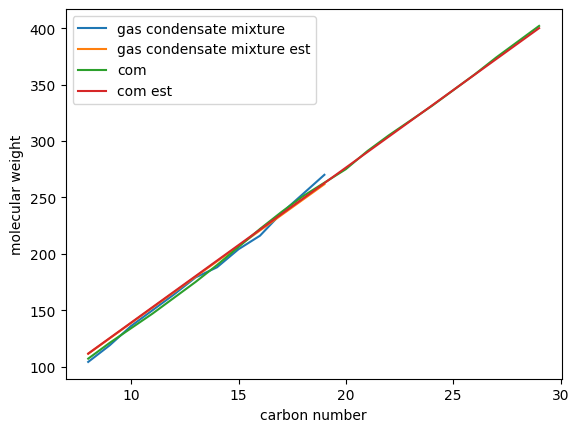

In [51]:
pl.plot(cn1,mw1,label='gas condensate mixture')
pl.plot(cn1,mw1_est_cis,label='gas condensate mixture est')

pl.plot(cn2,mw2,label='com')
pl.plot(cn2,mw2_est_cis,label='com est')

pl.xlabel('carbon number')
pl.ylabel('molecular weight')
pl.legend(loc='upper left')

In [52]:
Ad1 = fit_parameters1['Ad']
Ad2 = fit_parameters2['Ad']

rho1_est_cis = dcis.c_density(cn1,Ad1)
rho2_est_cis = dcis.c_density(cn2,Ad2)

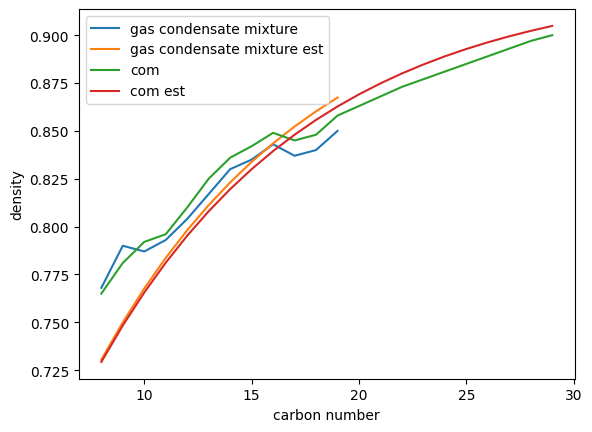

In [53]:
pl.plot(cn1,rho1,label='gas condensate mixture')
pl.plot(cn1,rho1_est_cis,label='gas condensate mixture est')

pl.plot(cn2,rho2,label='com')
pl.plot(cn2,rho2_est_cis,label='com est')

pl.xlabel('carbon number')
pl.ylabel('density')
pl.legend(loc='upper left')

### Numero maximo de carbono a distribuir

In [54]:
cn1_res = df1['carbon_number'].iloc[-1]
z1_res = df1['mole_percentage'].iloc[-1]
mw1_res = df1['molecular_weight'].iloc[-1]
rho1_res = df1['density'].iloc[-1]

cn2_res = df2['component'].iloc[-1]
z2_res = df2['molar_percentage'].iloc[-1]
mw2_res = df2['molar_mass'].iloc[-1]
rho2_res = df2['density'].iloc[-1]

In [55]:
from charapy import Residual_fraction

residual_fraction1 = Residual_fraction(mw1_res,z1_res)
residual_fraction2 = Residual_fraction(mw2_res,z2_res)

cr_it1 = np.array(range(cn1_res,10000,1))
cr_it2 = np.array(range(cn2_res,10000,1))

C1 = fit_parameters1['C']
C2 = fit_parameters2['C']

cn_res_max1 = residual_fraction1.carbon_number_max(cr_it1,A1,B1,C1)
cn_res_max2 = residual_fraction2.carbon_number_max(cr_it2,A2,B2,C2)

print('Número máximo para la mezcla de gas condensado:',cn_res_max1)
print('Numero maximo para com:', cn_res_max2)

Número máximo para la mezcla de gas condensado: 10000
Numero maximo para com: 38


# DISTRIBUCION

In [56]:
from charapy import Distribution_pedersen, Distribution_cismondi

distribution_pedersen = Distribution_pedersen()
distribution_cismondi = Distribution_cismondi()

c_range1 = np.arange(cn1_res+1,cn_res_max1+1,1)
c_range2 = np.arange(cn2_res+1,cn_res_max2+1,1)

ped_density1 = distribution_pedersen.p_density(c_range1,L1,M1)
ped_density2 = distribution_pedersen.p_density(c_range2,L2,M2)

cis_density1 = distribution_cismondi.c_density(c_range1,Ad1)
cis_density2 = distribution_cismondi.c_density(c_range2,Ad2)

ped_mw1 = distribution_pedersen.p_molecular_weight(c_range1)
ped_mw2 = distribution_pedersen.p_molecular_weight(c_range2)

cis_mw1 = distribution_cismondi.c_molecular_weight(c_range1,C1)
cis_mw2 = distribution_cismondi.c_molecular_weight(c_range2,C2)

ped_mf1 = distribution_pedersen.p_molar_fraction(c_range1,A1,B1)
ped_mf2 = distribution_pedersen.p_molar_fraction(c_range2,A2,B2)

cis_mf1 = distribution_cismondi.c_molar_fraction(c_range1, AC1, BC1)
cis_mf2 = distribution_cismondi.c_molar_fraction(c_range2,AC2,BC2)

-----------------------------

In [57]:
df1['molar_percentage_pedersen']=df1['mole_percentage']
df2['molar_percentage_pedersen']=df2['molar_percentage']

df1['molar_percentage_cismondi']=df1['mole_percentage']
df2['molar_percentage_cismondi']=df2['molar_percentage']

df1['molecular_weight_pedersen']=df1['molecular_weight']
df2['molecular_weight_pedersen']=df2['molar_mass']

df1['molecular_weight_cismondi']=df1['molecular_weight']
df2['molecular_weight_cismondi']=df2['molar_mass']

df1['density_pedersen']=df1['density']
df2['density_pedersen']=df2['density']

df1['density_cismondi']=df1['density']
df2['density_cismondi']=df2['density']

df1=df1.drop(['molecular_weight','mole_percentage','density'],axis=1)
df2=df2.drop(['molar_mass','molar_percentage','density'],axis=1)

In [58]:
df1['Tc_pedersen']=np.nan
df2['Tc_pedersen']=np.nan
df1['Tc_cismondi']=np.nan
df2['Tc_cismondi']=np.nan
df1['Pc_pedersen']=np.nan
df2['Pc_pedersen']=np.nan
df1['Pc_cismondi']=np.nan
df2['Pc_cismondi']=np.nan

# CORRELACIONES 

In [59]:
from charapy import Correlations

correlations = Correlations('PR')

tc_ped1=correlations.critical_temperature(ped_mw1,ped_density1)
tc_ped2=correlations.critical_temperature(ped_mw2,ped_density2)

tc_cis1=correlations.critical_temperature(cis_mw1,cis_density1)
tc_cis2=correlations.critical_temperature(cis_mw2,cis_density2)

pc_ped1=correlations.critical_pression(ped_mw1, ped_density1)
pc_ped2=correlations.critical_pression(ped_mw2,ped_density2)

pc_cis1=correlations.critical_pression(cis_mw1,cis_density1)
pc_cis2=correlations.critical_pression(cis_mw2,cis_density2)

/home/marlen/Charapy/charapy.py:354: RuntimeWarning: overflow encountered in exp
  return np.exp(pression_log)


In [60]:
for i in range (len(c_range1)):
    df1=pd.concat([df1,
        pd.DataFrame(
        {'carbon_number':c_range1[i],
        'molar_percentage_pedersen':ped_mf1[i],
        'molar_percentage_cismondi':cis_mf1[i],
        'molecular_weight_pedersen':ped_mw1[i],
        'molecular_weight_cismondi':cis_mw1[i],
        'density_pedersen':ped_density1[i],
        'density_cismondi':cis_density1[i], 
        'Tc_pedersen':tc_ped1[i],
        'Tc_cismondi':tc_cis1[i],
        'Pc_pedersen':pc_ped1[i],
        'Pc_cismondi':pc_cis1[i]   
        },index=[c_range1[i]])])
df1

,component,carbon_number,molar_percentage_pedersen,molar_percentage_cismondi,molecular_weight_pedersen,molecular_weight_cismondi,density_pedersen,density_cismondi,Tc_pedersen,Tc_cismondi,Pc_pedersen,Pc_cismondi
0,C7,7,1.33,1.33,91.3,91.300000,0.746000,0.746000,NaN,NaN,NaN,NaN
1,C8,8,1.33,1.33,104.1,104.100000,0.768000,0.768000,NaN,NaN,NaN,NaN
2,C9,9,0.78,0.78,118.8,118.800000,0.790000,0.790000,NaN,NaN,NaN,NaN
3,C10,10,0.61,0.61,136.0,136.000000,0.787000,0.787000,NaN,NaN,NaN,NaN
4,C11,11,0.42,0.42,150.0,150.000000,0.793000,0.793000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,NaN,9996,0.00,0.00,139940.0,136592.831297,1.438021,0.935744,87846.098438,85735.831364,inf,1.632235
9997,NaN,9997,0.00,0.00,139954.0,136606.495845,1.438031,0.935744,87854.771282,85744.295960,inf,1.632235
9998,NaN,9998,0.00,0.00,139968.0,136620.160392,1.438040,0.935744,87863.444125,85752.760556,inf,1.632235
9999,NaN,9999,0.00,0.00,139982.0,136633.824940,1.438050,0.935744,87872.116967,85761.225151,inf,1.632235


In [61]:
for i in range (len(c_range2)):
    df2=pd.concat([df2,
        pd.DataFrame(
        {'component':c_range2[i],
        'molar_percentage_pedersen':ped_mf2[i],
        'molar_percentage_cismondi':cis_mf2[i],
        'molecular_weight_pedersen':ped_mw2[i],
        'molecular_weight_cismondi':cis_mw2[i],
        'density_pedersen':ped_density2[i],
        'density_cismondi':cis_density2[i], 
        'Tc_pedersen':tc_ped2[i],
        'Tc_cismondi':tc_cis2[i],
        'Pc_pedersen':pc_ped2[i],
        'Pc_cismondi':pc_cis2[i]   
        },index=[c_range2[i]])])
df2

,component,molar_percentage_pedersen,molar_percentage_cismondi,molecular_weight_pedersen,molecular_weight_cismondi,density_pedersen,density_cismondi,Tc_pedersen,Tc_cismondi,Pc_pedersen,Pc_cismondi
0,7,2.870000,2.870000,96.0,96.000000,0.738000,0.738000,NaN,NaN,NaN,NaN
1,8,4.080000,4.080000,107.0,107.000000,0.765000,0.765000,NaN,NaN,NaN,NaN
2,9,3.510000,3.510000,121.0,121.000000,0.781000,0.781000,NaN,NaN,NaN,NaN
3,10,3.260000,3.260000,134.0,134.000000,0.792000,0.792000,NaN,NaN,NaN,NaN
4,11,2.510000,2.510000,147.0,147.000000,0.796000,0.796000,NaN,NaN,NaN,NaN
5,12,2.240000,2.240000,161.0,161.000000,0.810000,0.810000,NaN,NaN,NaN,NaN
6,13,2.180000,2.180000,175.0,175.000000,0.825000,0.825000,NaN,NaN,NaN,NaN
7,14,2.070000,2.070000,190.0,190.000000,0.836000,0.836000,NaN,NaN,NaN,NaN
8,15,2.030000,2.030000,206.0,206.000000,0.842000,0.842000,NaN,NaN,NaN,NaN
9,16,1.670000,1.670000,222.0,222.000000,0.849000,0.849000,NaN,NaN,NaN,NaN


In [65]:
from charapy import Lumping

lumping = Lumping()
dat1 = lumping.lumpy([(7,11),(12,14),(15,18),(19,22),(23,25),(26,30),(31,34),(35,38),(39,49),(50,100),(101,1000),(1001,5000),(5001,10000)],df1,'carbon_number')
dat1

/home/marlen/Charapy/charapy.py:510: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dropna=False).mean()


,carbon_number,molar_percentage_pedersen,molar_percentage_cismondi,molecular_weight_pedersen,molecular_weight_cismondi,density_pedersen,density_cismondi,Tc_pedersen,Tc_cismondi,Pc_pedersen,Pc_cismondi
ID,,,,,,,,,,,
0.0,"(7, 11)",8.940000e-01,8.940000e-01,120.04,120.040000,0.776800,0.776800,NaN,NaN,NaN,NaN
1.0,"(12, 14)",3.300000e-01,3.300000e-01,177.00,177.000000,0.817000,0.817000,NaN,NaN,NaN,NaN
2.0,"(15, 18)",2.075000e-01,2.075000e-01,227.25,227.250000,0.838750,0.838750,NaN,NaN,NaN,NaN
3.0,"(19, 22)",2.716481e-01,2.375000e-01,313.75,313.150244,0.863234,0.872979,794.444121,794.711635,1.885520e+00,1.968519
4.0,"(23, 25)",4.176096e-02,1.968288e-09,332.00,329.961858,0.873238,0.894158,828.396044,828.035036,1.830348e+00,1.948315
5.0,"(26, 30)",1.926012e-02,6.726460e-11,388.00,384.620049,0.887605,0.907682,880.094038,878.582249,1.788450e+00,1.950192
6.0,"(31, 34)",7.712722e-03,6.460041e-13,451.00,446.110513,0.901622,0.917918,935.569750,932.630940,1.789123e+00,1.969561
7.0,"(35, 38)",3.464456e-03,1.327907e-14,507.00,500.768704,0.912501,0.923795,982.930624,978.650714,1.827845e+00,1.985966
8.0,"(39, 49)",9.136305e-04,1.013393e-16,612.00,603.252812,0.929798,0.929850,1067.965642,1061.112015,1.998639e+00,1.994172


In [66]:
lumping = Lumping()
dat2 = lumping.lumpy([(7,11),(12,14),(15,18),(19,22),(23,25),(26,30),(31,34),(35,38)],df2,'component')
dat2

,component,molar_percentage_pedersen,molar_percentage_cismondi,molecular_weight_pedersen,molecular_weight_cismondi,density_pedersen,density_cismondi,Tc_pedersen,Tc_cismondi,Pc_pedersen,Pc_cismondi
ID,,,,,,,,,,,
0.0,"(7, 11)",3.246000,3.246000,121.000000,121.000000,0.774400,0.774400,NaN,NaN,NaN,NaN
1.0,"(12, 14)",2.163333,2.163333,175.333333,175.333333,0.823667,0.823667,NaN,NaN,NaN,NaN
2.0,"(15, 18)",1.610000,1.610000,229.000000,229.000000,0.846000,0.846000,NaN,NaN,NaN,NaN
3.0,"(19, 22)",0.970000,0.970000,283.500000,283.500000,0.865500,0.865500,NaN,NaN,NaN,NaN
4.0,"(23, 25)",0.640000,0.640000,331.333333,331.333333,0.881000,0.881000,NaN,NaN,NaN,NaN
5.0,"(26, 30)",2.376000,2.376000,394.420000,394.420000,0.913600,0.913600,NaN,NaN,NaN,NaN
6.0,"(31, 34)",0.265399,0.000080,451.000000,448.128267,0.912893,0.911975,936.397097,933.903177,1.900249,1.892175
7.0,"(35, 38)",0.171090,0.000016,507.000000,503.091025,0.924735,0.917702,983.828631,980.109722,1.996238,1.894049
